## Task 1
Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic
- The x-axis is the income variable - GDP per capita adjusted by purchasing power and denoted in dollars
- The y-axis is the life expectancy value (life_exp) - number of years a newborn would live if mortailty rates remained constant throughout its life
- The fill aesthetic is the global region variable (flour_regions), which determines the color of each point in the scatter plot - each country is assigned a one of four regions depending on geographic location (Asia, Europe, Africa, Americas)
- Each country in the country variable is represented by a single point on the graph. Unfortunately, the interactive element that allows one to hover above the point to reveal the associated country is not available in plotnine
- Population variable (population) determines the size of the points in the scatter plot - number of people living in the country
- The year variable (year) is present in the background of the visualization and can be manipulated by a slider

In [1]:
# Import the q1data.csv dataset
import pandas as pd
df1 = pd.read_csv('Lab 1 Datasets/q1data.csv')

In [2]:
from plotnine import ggplot, aes, geom_point, scale_size, scale_x_log10, scale_x_log10, scale_y_log10, scale_y_continuous, annotate, guides, theme, geom_tile

C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10
C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


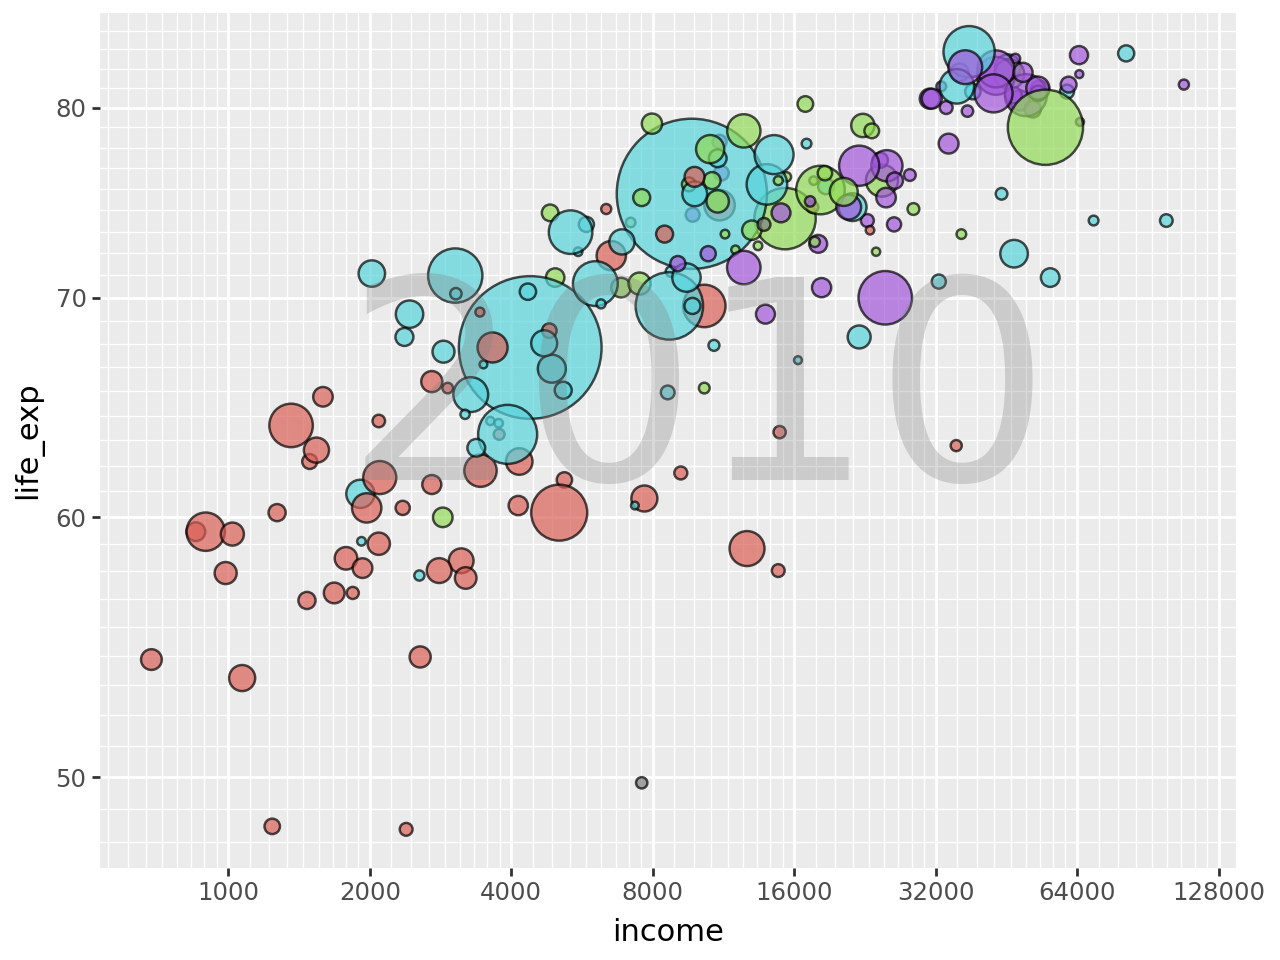

In [17]:
# Recreate the plot as best you can using plotnine.
(ggplot(df1, aes(x = "income",
                y = "life_exp",
                fill = "four_regions",
                size = "population"
))
+ geom_point(alpha = .7)
+ scale_size(range=(1, 30))
+ scale_x_log10(breaks=[0, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000])
+ scale_y_log10(breaks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
+ annotate("text", x=10000, y=65, label="2010", size=100, alpha=0.3, color="gray")
+ theme(legend_position="none")
+ guides(fill=False)
)

What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why its good or bad for visualizing these data

- Geom_tile is another geometry that can represent the same variables. This geometry is not as good because it is messy and hard to discern exactly what's going on in the plot. For example, all of the tiles are overlapping and it is impossible to tell which tiles have greater populations.

C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10
C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_tile : Removed 2 rows containing missing values.


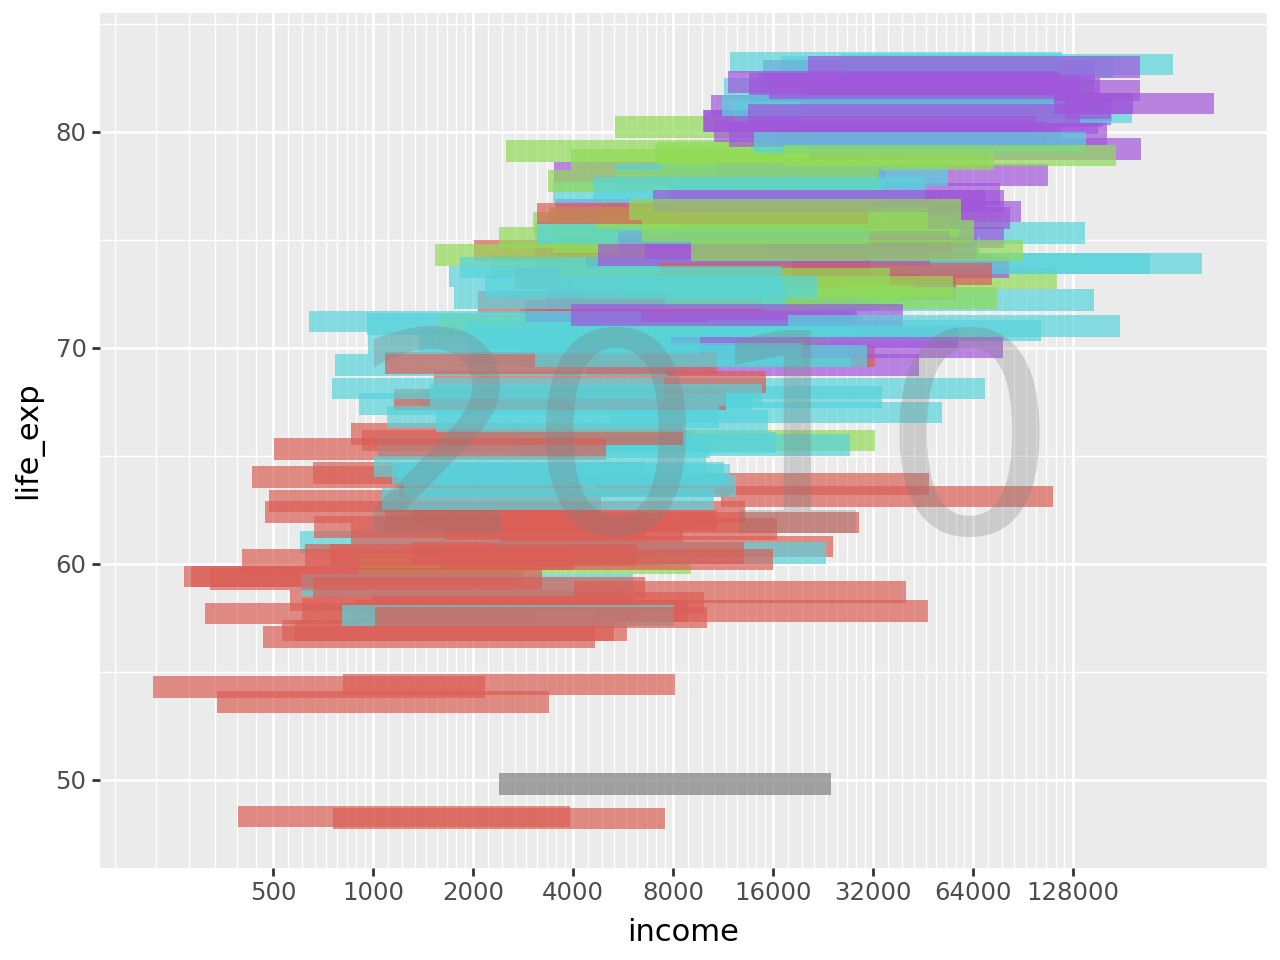

In [20]:
(ggplot(df1, aes(x = "income",
                y = "life_exp",
                fill = "four_regions",
                size = "population"
))
+ geom_tile(alpha = .7)
+ scale_size(range=(1, 30))
+ scale_x_log10(breaks=[0, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000])
+ scale_y_continuous(breaks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
+ annotate("text", x=10000, y=65, label="2010", size=100, alpha=0.3, color="gray")
+ theme(legend_position="none")
+ guides(fill=False)
)

## Task 2
Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic

- x-axis: exports
- y-axis: imports
- fill: four regions
- size: energy

In [1]:
# Import the q2data.csv dataset
import pandas as pd
import pandas as pd
df2 = pd.read_csv('Lab 1 Datasets/q2data.csv')

In [22]:
# clean the dataset
df2['energy'] = df2['energy'].replace('nan', pd.NA)
df2['exports'] = df2['exports'].replace('nan', pd.NA)
df2['imports'] = df2['imports'].replace('nan', pd.NA)

df2['energy'] = pd.to_numeric(df2['energy'], errors='coerce')
df2['exports'] = pd.to_numeric(df2['exports'], errors='coerce')
df2['imports'] = pd.to_numeric(df2['imports'], errors='coerce')

df2 = df2.dropna(subset=['energy', 'exports', 'imports'])


In [23]:
df2['imports'] = df2['imports'].astype(float)
df2['exports'] = df2['exports'].astype(float)

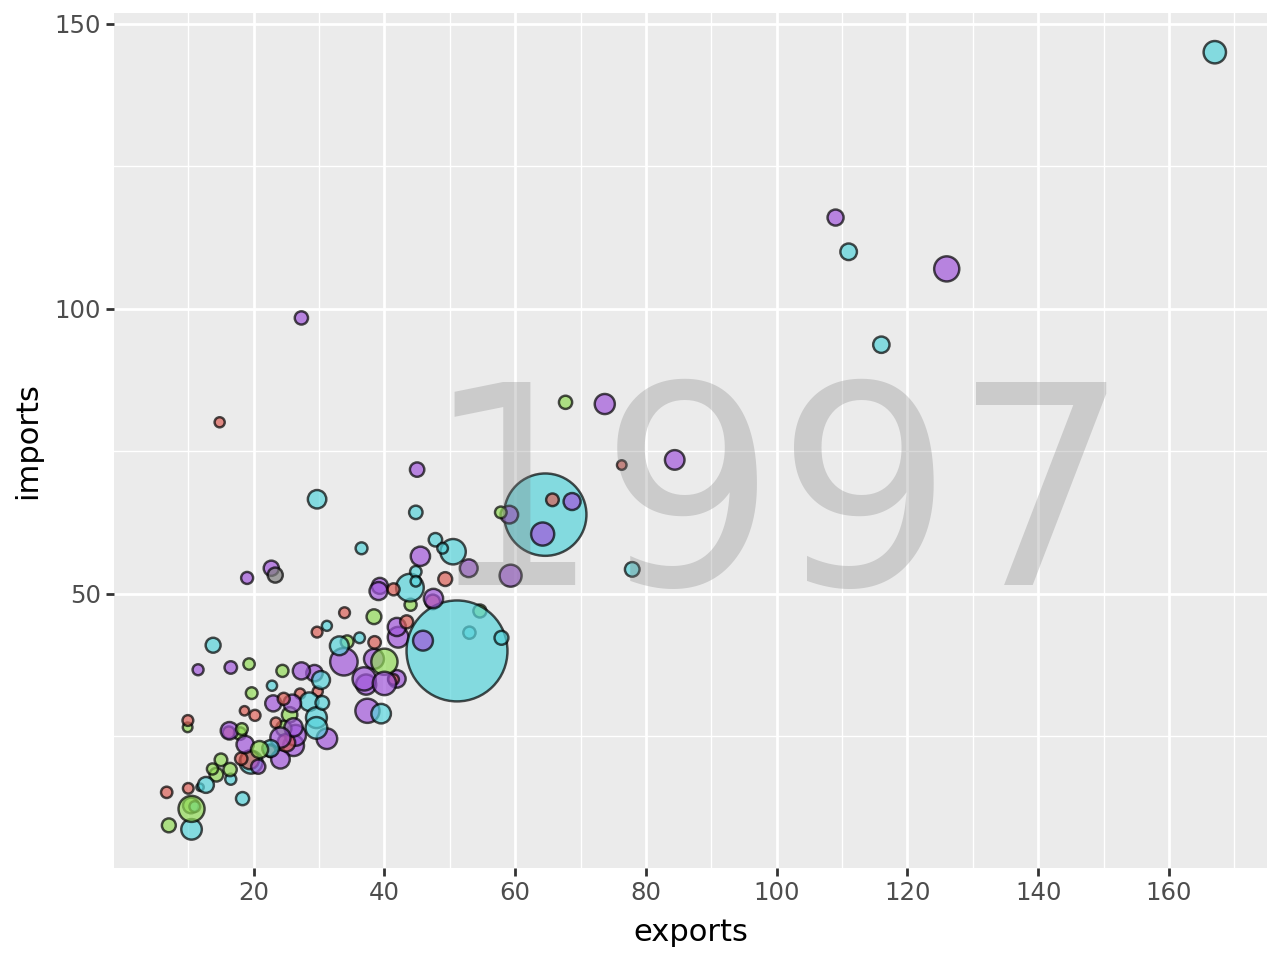

In [24]:
# Recreate the plot as best you can using plotnine
from plotnine import ggplot, aes, geom_point, scale_size, scale_x_continuous, scale_y_continuous, annotate, theme, guides
(ggplot(df2, aes(x='exports',
                        y='imports',
                        fill='four_regions',
                        size='energy'))
        + geom_point(alpha=0.7)
        + scale_size(range=(1, 20))
        + scale_x_continuous(breaks=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220])
        + scale_y_continuous(breaks=[50, 100, 150, 200, 250, 300, 350, 400])
        + annotate("text", x=100, y=65, label="1997", size=100, alpha=0.3, color="gray")
        + theme(legend_position="none")
        + guides(fill=False)
       )



What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why its good or bad for visualizing these data

- Box plots do an okay job of displaying the relevant information by region but there is a loss of richness in the data. The box plots don't caputure individual countries and the same information is has to be represented in multiple plots, and they can't handle the additional energy variable
- The box plots do however make it easier to see distincitons in regions

C:\Users\owenk\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 35 rows containing non-finite values.


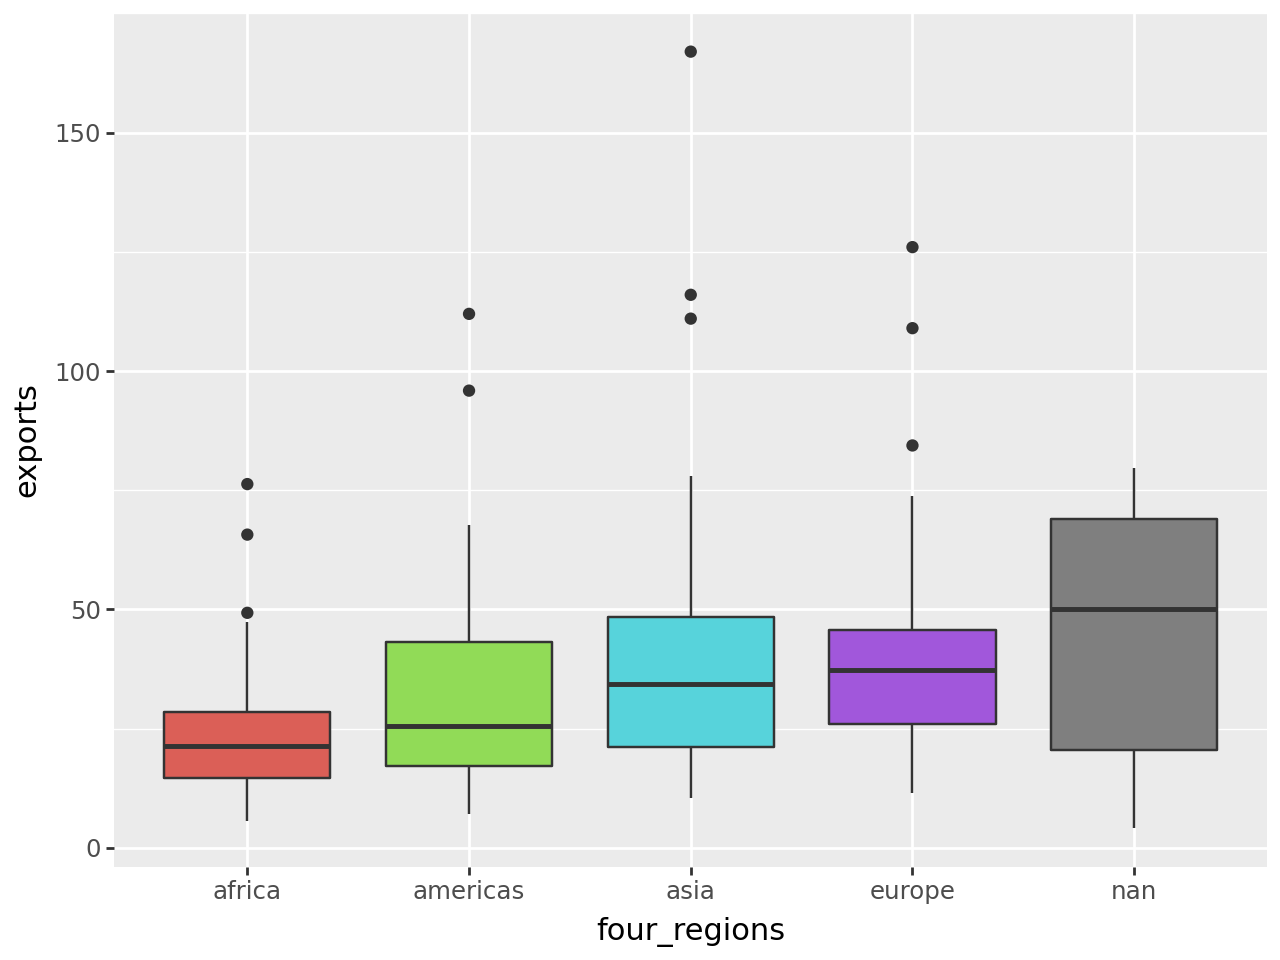

In [3]:
from plotnine import ggplot, aes, geom_boxplot, theme, guides
b1 = (ggplot(df2, aes(x='four_regions', y='exports', fill='four_regions'))
            + geom_boxplot()
            + theme(legend_position="none")
            + guides(fill=False)
           )
b1;

C:\Users\owenk\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 35 rows containing non-finite values.


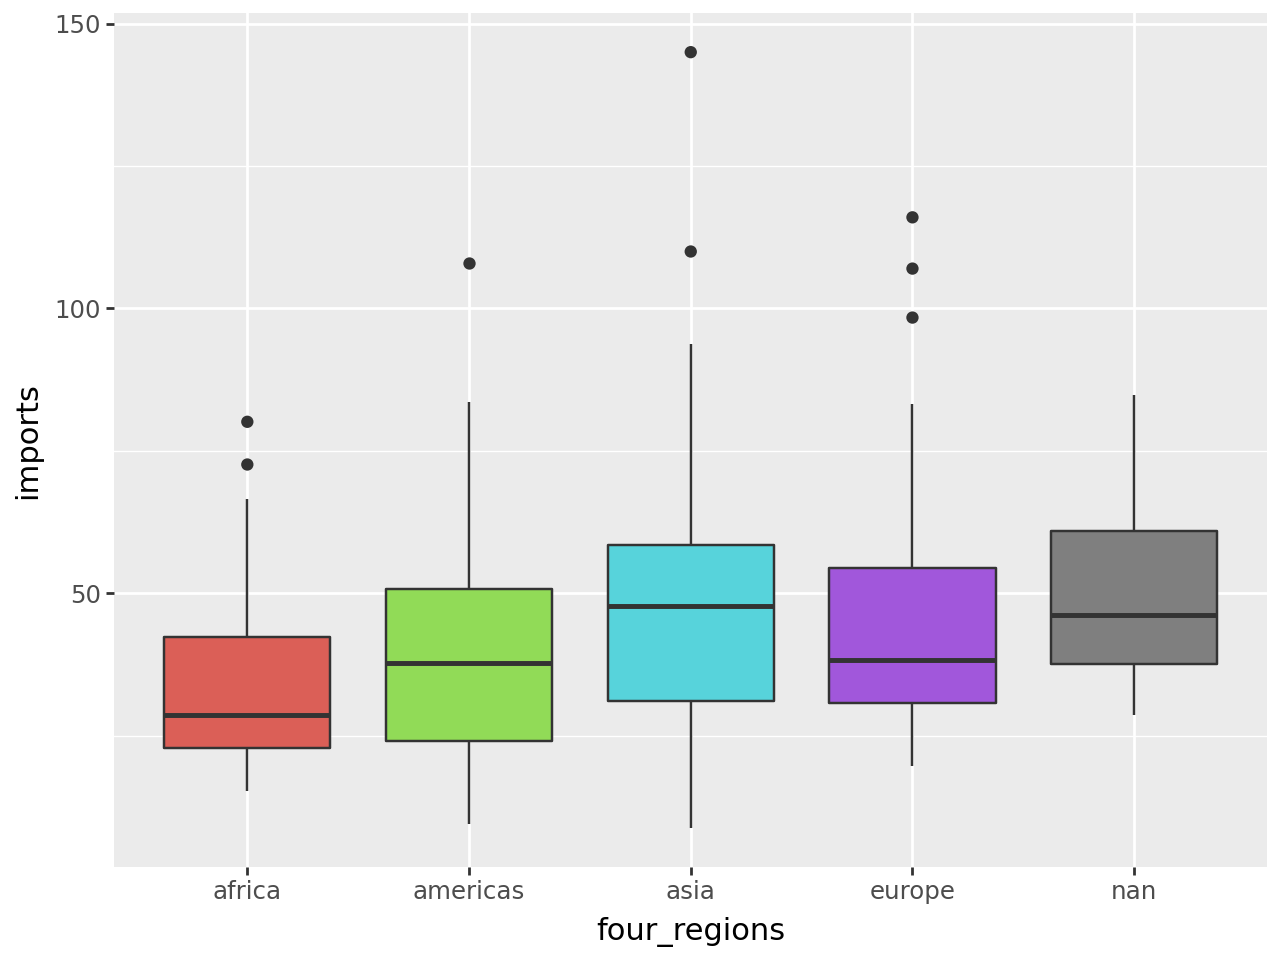

In [2]:
from plotnine import ggplot, aes, geom_boxplot, theme, guides
b2 = (ggplot(df2, aes(x='four_regions', y='imports', fill='four_regions'))
            + geom_boxplot()
            + theme(legend_position="none")
            + guides(fill=False)
           )
b2;

## Task 3
Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic

- x-axis: internet_users
- y-axis: gdp
- fill: region
- size: income

In [1]:
# Import the q3data.csv dataset
import pandas as pd
df3 = pd.read_csv('Lab 1 Datasets/q3data.csv')

In [6]:
df3 = df3.dropna()

C:\Users\owenk\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


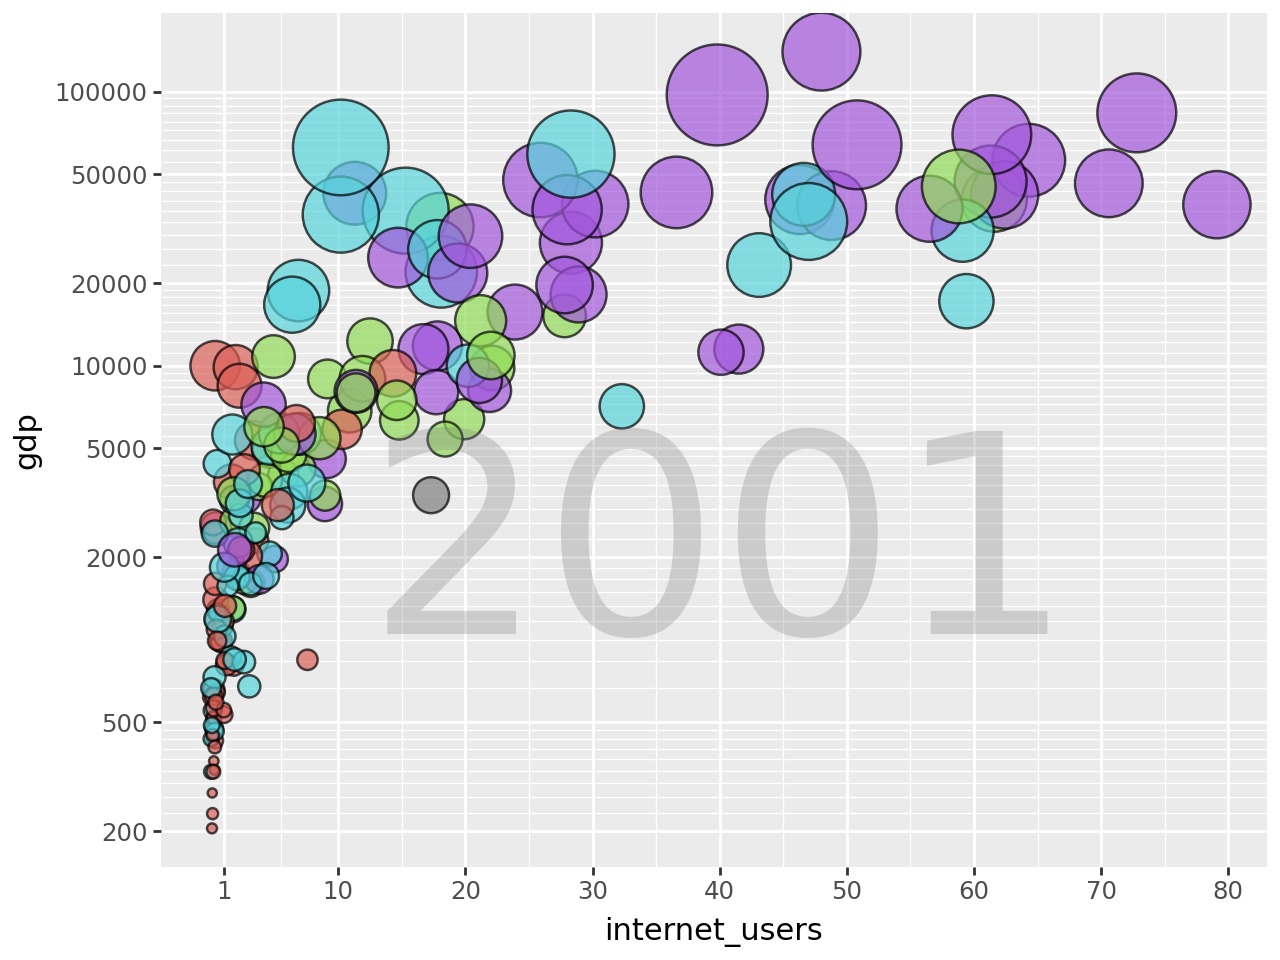

In [3]:
# Recreate the plot as best you can using plotnine
from plotnine import ggplot, aes, geom_point, scale_size, scale_x_continuous, scale_y_log10, annotate, theme, guides
p3 = (ggplot(df3, aes(x='internet_users',
                        y='gdp',
                        fill='four_regions',
                        size='income'))
        + geom_point(alpha=0.7)
        + scale_size(range=(1, 20))
        + scale_x_continuous(breaks=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90])
        + scale_y_log10(breaks=[200, 500, 2000, 5000, 10000, 20000, 50000, 100000])
        + annotate("text", x=40, y=2000, label="2001", size=100, alpha=0.3, color="gray")
        + theme(legend_position="none")
        + guides(fill=False)
        )
p3;

What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why its good or bad for visualizing these data?
- This bar chart is doesn't really give us any useful information and completely leaves out the internet_users variable. A scatter plot is definitely the way to go for all of these visualizations.

C:\Users\owenk\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\owenk\anaconda3\Lib\site-packages\plotnine\layer.py:344: PlotnineWarning: position_stack : Removed 16 rows containing missing values.


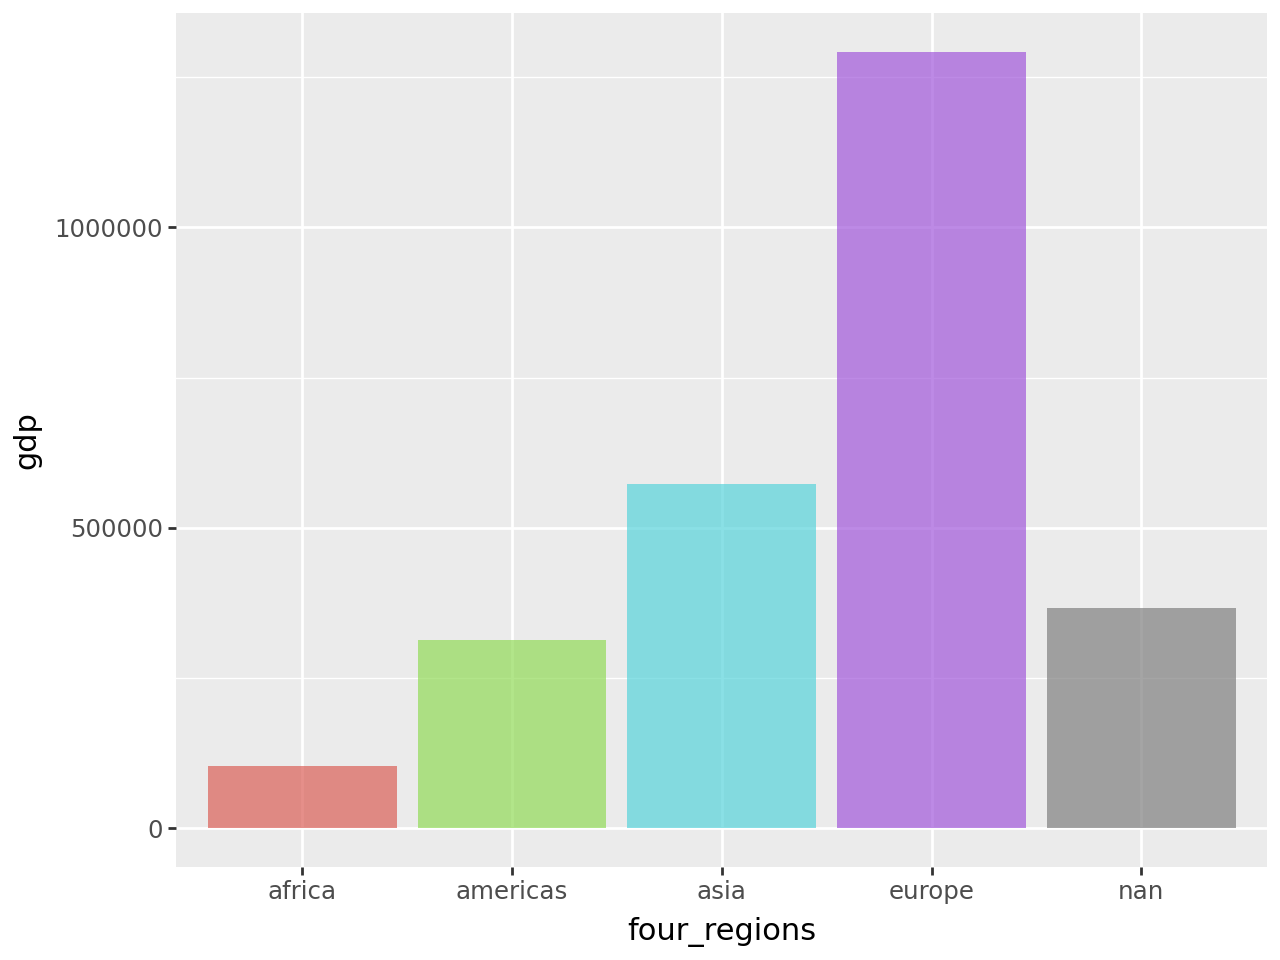

In [2]:
from plotnine import ggplot, aes, geom_bar, scale_size, theme, guides
bar = (ggplot(df3, aes(x='four_regions',
                            y='gdp',
                            fill='four_regions',
                            size='income'))
+ geom_bar(stat="identity", alpha=0.7)
+ scale_size(range=(1, 10))
+ theme(legend_position="none")
+ guides(fill=False)
)
